In [3]:
%%HTML                                                                                                           
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    padding: 1px  black solid !important;
  color: black !important;
}
</style>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df = pd.read_csv("Downloads/data/Project A.B Test/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [6]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [7]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [8]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# count rows is error
len(df.query('group == "treatment" and landing_page !="new_page" or group == "control" and landing_page !="old_page"'))

3893

f. Do any of the rows have missing values?

In [10]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# correct data frame [df2] 
df2 = df.query('group == "treatment" and landing_page =="new_page" or group == "control" and landing_page =="old_page"')
df2.shape[0]

290585

In [12]:
# test
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(['user_id'], keep ='last', inplace=True)
# test
df2['user_id'].duplicated().any()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2['converted'].mean() 

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
(df2.query('group == "control"')['converted'].mean())*100 , len(df2.query('group == "control" and converted == 1'))

(12.03863045004612, 17489)

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
(df2.query('group == "treatment"')['converted'].mean() )*100 , len(df2.query('group == "treatment" and converted == 1'))

(11.880806551510565, 17264)

d. What is the probability that an individual received the new page?

In [20]:
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

In [21]:
page = df2.groupby('landing_page')['landing_page'].count()
print(page )
print('='*40)
print((page[0]/page.sum())*100 ,'\n', (page[1]/page.sum())*100)

landing_page
new_page    145310
old_page    145274
Name: landing_page, dtype: int64
50.00619442226688 
 49.99380557773312


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

__answer :__

> * __The probability of the users receive the new or the old page is the same and equal to `50%`.__
* __The Probability of converting regardless of page is: `11.96%`__
* __The probability of converting in the control group is: `12.04%` which represents `17489` users in the control group converted.__
* __The probability of converting in the treatment group is: `11.88%` which represents `17264` users in the treatment group converted.__

__We find that old page has a slightly higher conversion rate than the new page, but by a very tiny margin, therefore we don't have sufficient evidence to conclude that the old page page leads to more conversions than the new page.__

**In other words, we cannot state with certainty that one page leads to more conversions.**

**We can confirm our findings by calculate the p-value based on a hypothesis test for the new and old pages.**

**We can guess that change aversion or novelty effect or test time duration or other potentially influencing factors are not accounted for. So, This is even more important due to almost similar perforamnce of both pages.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The Hypothesis below:**



$H_{0}$ :  $P_{new}$ <= $P_{old}$  

$H_{1}$ :  $P_{new}$ > $P_{old}$ 

Our alternative hypothesis is what we want to prove to be true, in this case, that the new page design has a higher converted rate than the old page. And the null hypothesis is what we assume to be true before analyzing data, which is that the new page has a converted rate that is less than or equal to that of the old page. we can rearrange our hypotheses to look like this:


$H_{0}$ :  $P_{new}$ - $P_{old}$ <= 0

$H_{1}$ :  $P_{new}$ - $P_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# As p_old = p_new = converted rate in ab_data.csv regardless of the page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# As p_old = p_new = converted rate in ab_data.csv regardless of the page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17382

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17528

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

-0.0010346402275003275

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# bootstrapping 
p_diffs = []

for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new, p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old, p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

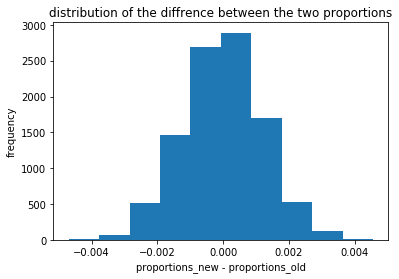

In [30]:
# Convert to numpy array
p_diffs = np.array(p_diffs)
# Plot sampling distribution
plt.hist(p_diffs);
plt.title('distribution of the diffrence between the two proportions');
plt.xlabel('proportions_new - proportions_old');
plt.ylabel('frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# Calculate the actucl difference observed in ab_data
p_treatment = df2.query('group == "treatment"')['converted'].mean() 
p_control = df2.query('group == "control"')['converted'].mean() 
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

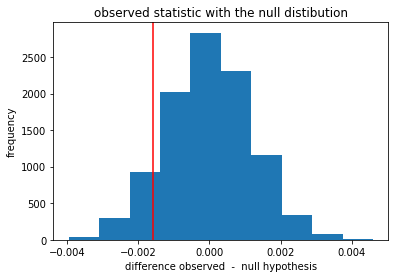

In [32]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)
# Plot the null distribution
plt.hist(null_vals);
# Plot observed statistic with the null distibution
plt.axvline(obs_diff, color='r');
plt.title('observed statistic with the null distibution');
plt.xlabel('difference observed  -  null hypothesis');
plt.ylabel('frequency');

In [33]:
# Compute p-value
(null_vals > obs_diff).mean()

0.9029

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 __answer:__

> **we've just computed the p-value, this is the probability of observing our statistic where the null hypothesis is true.
 As that p-value is greater than 0.05, we would fail to reject the null hypothesis and therefore keep the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
import  statsmodels.api as sm

convert_old = len(df2.query("landing_page == 'old_page' and converted != 0"))
convert_new = len(df2.query("landing_page == 'new_page' and converted != 0"))
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
#calculate Z-Score and P_value
print("z_score : ", z_score)
print("p_value : ", p_value)

z_score :  1.3109241984234394
p_value :  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

__answer:__

> **Here is a short cut
To calculate the p-value, this is the probability of observing our stats where the null hypothesis is true. Since the p-    value is greater than 0.05, we will fail to reject the null hypothesis and thus keep the old page. Yes, the results matched what we calculated for the p-value in findings in parts j. and k.**
 
> **Conclusion: the company can take the decision of keeping the old page for theie e-commerce website.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**answer**
> __Since the response variable in our case is of categorical type, an appropriate regression is a `logistic regression`__

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2.head(n=3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [36]:
df2['intercept'] = 1
# create a dummy variable column for which page each user received.
df2[ 'ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# Building logistic model
import  statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:00:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [39]:
# Put the resulting value under the exponent
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

> **the interpreting of this model is if the indivisual uses the new page, it is .985 times more likely to make a conversion than if he uses the old page. which means that there is a very tiny diffrence in the performance between the both pages, with more a little bit in the old page.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**answer**

>__The p-value associated with ab_page is: `0.190`.
The difference between this P-value and that which is calculated in part II comes from the difference in the null and alternative hypothesis for each other.
In this logistic regression model, our null and alternative hypotheses are as shown below:__

> $H_{0}$$:$ $P_{new}$ $=$ $P_{old}$

> $H_{1}$$:$ $P_{new}$ $≠$ $P_{old}$

> **Since the P-value (`0.190`) > the level of significance (0.05), we cannot reject the null hypothesis, and we can say, that there isn't a significant difference depending on the page type.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**answer**
> **Adding some factors to the logistic regression model in our case can produce more accurate results because these factors may contribute to the importance of our test results and lead to more accurate decisions. Among these factors may be, for example, the appropriate payment method for it or not, the product was like Whatever he wants or not, or the price is right for him or not, however, adding these factors is important, but it may backfire or the combined effect of these factors may disappear and only appear if these factors are tested individually. This is one of the defects and is known as the `Simpson's paradox`.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#loading dataset
countries_df = pd.read_csv("Downloads/data/Project A.B Test/countries.csv")
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# knowing the unique values 
countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
# Merge the dataframes together
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# Create the necessary dummy variables
df_new =  df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
# Building logistic model
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        15:00:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [44]:
# Put the resulting value under the exponent
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [45]:
# Change the direction of the Parameters from increase to decrease
1/np.exp(results.params)

intercept    7.310207
ab_page      1.015056
CA           1.041599
UK           0.990165
dtype: float64

**answer**

> **.If an individual is from US, it is 0.9901 times more likely to make a conversion than if he is from UK , holding all other variables constant.**
> **If an indivisual is from US , it is 1.04 more likely to make a conversion than if he is from CA, holding all other variables constant.**

> **from these values which is very close to 1 time, we can notice that there is no influence on the conversion rate comes from the country variable.**


`h`. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

 Provide the summary results, and your conclusions based on the results.

In [46]:
# Create the necessary additional columns interacting between the ab_page and country columns
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [47]:
# Building logistic model
x_variable = df_new[['intercept', 'ab_page', 'CA','UK' ,'CA_page', 'UK_page']]
logit_mod = sm.Logit(df_new['converted'], x_variable)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        15:00:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [48]:
# Put the resulting value under the exponent
np.exp(results.params)

intercept    0.137178
ab_page      0.979646
CA           0.982625
UK           0.994272
CA_page      0.954198
UK_page      1.031896
dtype: float64

In [49]:
# Change the direction of the Parameters from increase to decrease
1/ np.exp(results.params)

intercept    7.289813
ab_page      1.020776
CA           1.017682
UK           1.005761
CA_page      1.048001
UK_page      0.969090
dtype: float64

**answer**

> **there is no influence in the conversion rate if an indivisual uses old page or new page, or if he is in a specific country or other country and .there is no diffrence in the conversion rate if an indivisual uses one of the pages and he is in a specific country.**

<a id='conclusions'></a>
### Conclusions

>* __Based on these results, we can see that the P-values for the interaction terms are definitely not significant, so we accept the null hypothesis and reject the alternate hypothesis.__
>* **There is no impact on the conversion rate.**
>* **can other factors exist but are not included in our data.**
>* **Based on these results i recommend that the company take the decision of keeping the old page**.

### resources
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

https://www.statsmodels.org/dev/gettingstarted.html

https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa
